In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Trabajando con comandos de RelationalData

> _1. Encuentren los 10 equipos que más goles metieron en todas las Ligas de Europa_

Uso el dataset Teamstats y Teams para encontrar los equipos con más goles

In [3]:
df_teamstats = pd.read_csv('./data/teamstats.csv')
df_teamstats

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,16133,235,2020,2021-05-23 19:00:00,a,0,0.357583,9,2,0,39.7273,10,3,0.0,0,L
25356,16134,175,2020,2021-05-23 19:00:00,h,0,1.460500,19,5,6,7.5600,13,9,1.0,0,L
25357,16134,181,2020,2021-05-23 19:00:00,a,1,1.380290,10,2,3,14.7200,10,3,0.0,0,W
25358,16135,225,2020,2021-05-23 19:00:00,h,1,0.323960,6,2,1,15.1000,17,2,1.0,0,D


In [4]:
df_teams = pd.read_csv('./data/teams.csv')
df_teams

,teamID,name
0,71,Aston Villa
1,72,Everton
2,74,Southampton
3,75,Leicester
4,76,West Bromwich Albion
...,...,...
141,182,Nancy
142,224,Amiens
143,225,Strasbourg
144,235,Nimes


In [5]:
df_teams_joined = pd.merge(df_teams, df_teamstats, on='teamID', how='inner')
df_teams_joined

,teamID,name,gameID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,71,Aston Villa,82,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
1,71,Aston Villa,91,2015,2015-08-14 22:45:00,h,0,0.219118,5,1,3,10.0333,14,3,2.0,0,L
2,71,Aston Villa,104,2015,2015-08-22 18:00:00,a,1,0.765278,11,2,6,8.4762,15,4,3.0,0,L
3,71,Aston Villa,113,2015,2015-08-29 18:00:00,h,2,2.274060,21,6,12,8.6364,10,5,2.0,0,D
4,71,Aston Villa,129,2015,2015-09-13 19:00:00,a,2,0.953181,11,4,5,8.4091,13,5,1.0,0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,241,Brest,16092,2020,2021-04-24 11:00:00,a,2,0.920463,12,7,10,7.3043,11,2,1.0,0,W
25356,241,Brest,16096,2020,2021-05-02 13:00:00,h,1,1.635170,16,7,12,7.8000,12,5,2.0,0,L
25357,241,Brest,16111,2020,2021-05-09 13:00:00,a,2,1.026220,9,2,5,30.7500,11,5,1.0,0,L
25358,241,Brest,16122,2020,2021-05-16 19:00:00,a,0,1.966960,22,9,13,11.1053,13,11,3.0,0,D


In [6]:
df_team_goals_top10 = df_teams_joined.groupby(['name'])['goals'].sum().sort_values(ascending=False).head(10)
df_team_goals_top10

name
Barcelona              698
Paris Saint Germain    642
Bayern Munich          628
Real Madrid            628
Manchester City        620
Napoli                 542
Juventus               533
Liverpool              519
Borussia Dortmund      505
Roma                   499
Name: goals, dtype: int64

> 2. Hagan un gráfico de barras que muestre la información del ejercicio anterior, donde cada barra
tenga el nombre del equipo correspondiente

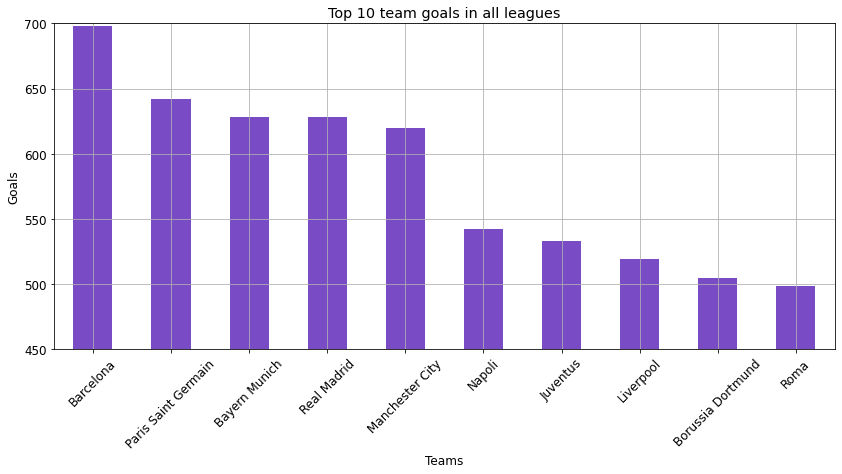

In [9]:
plt.rcParams.update({'font.size': 12})
# plt.figure(facecolor='#333333')
ax = df_team_goals_top10.plot(
    kind="bar",
    figsize=(14,6),
    title="Top 10 team goals in all leagues",
    xlabel="Teams",
    ylabel="Goals",
    grid=True,
    color="#794bc4"
)
ax.set_ylim(450, 700)
# ax.xaxis.label.set_color('white')
# ax.yaxis.label.set_color('white')
# ax.tick_params(colors='white', which='both')
# ax.title.set_color('white')
plt.xticks(rotation=45);

> 3. Repitan los ejercicios 1. y 2. pero en vez de analizar la cantidad de goles totales, analizar los tiros al arco (shots).

In [10]:
df_team_shots_top10 = df_teams_joined.groupby(['name'])['shots'].sum().sort_values(ascending=False).head(10)
df_team_shots_top10

name
Napoli             4645
Manchester City    4609
Real Madrid        4463
Liverpool          4267
Bayern Munich      4261
Roma               4239
Juventus           4220
Inter              4144
Barcelona          4097
Chelsea            4065
Name: shots, dtype: int64

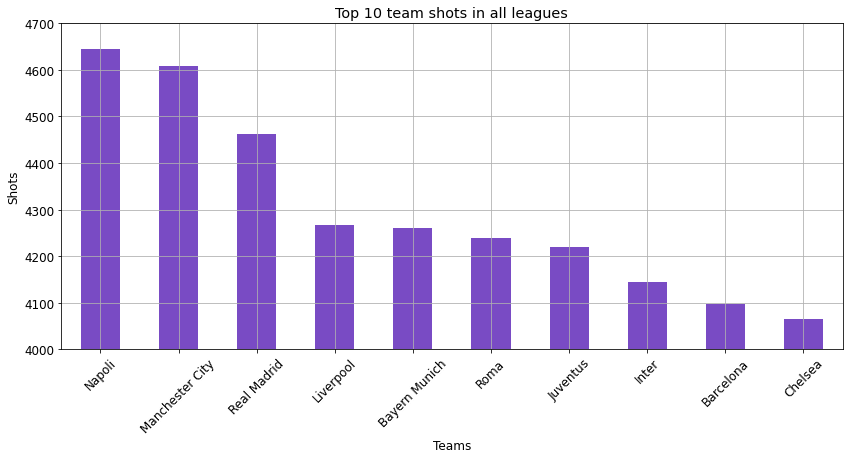

In [11]:
plt.rcParams.update({'font.size': 12})
# plt.figure(facecolor='#333333')
ax = df_team_shots_top10.plot(
    kind="bar",
    figsize=(14,6),
    title="Top 10 team shots in all leagues",
    xlabel="Teams",
    ylabel="Shots",
    grid=True,
    color="#794bc4"
)
ax.set_ylim(4000, 4700)
# ax.xaxis.label.set_color('white')
# ax.yaxis.label.set_color('white')
# ax.tick_params(colors='white', which='both')
# ax.title.set_color('white')
plt.xticks(rotation=45);

> 4. Realicen un gráfico de dispersión (scatter plot) entre las variables goles totales y tiros al arco
totales para cada uno de estos equipos. Analicen qué variable pondrían en cada eje. ¿Se observa
alguna relación entre la cantidad de tiros al arco y la cantidad de goles convertidos?

In [12]:
teams_top10 = list(df_team_goals_top10.reset_index()["name"]) + list(df_team_shots_top10.reset_index()["name"])
teams_top10 = list(set(teams_top10))
df_teams_top10 = df_teams_joined[df_teams_joined["name"].isin(teams_top10)][['name', 'goals', 'shots']]
df_teams_top10 = df_teams_top10.groupby(['name']).sum()
df_teams_top10

,goals,shots
name,,
Barcelona,698,4097
Bayern Munich,628,4261
Borussia Dortmund,505,3503
Chelsea,469,4065
Inter,474,4144
Juventus,533,4220
Liverpool,519,4267
Manchester City,620,4609
Napoli,542,4645


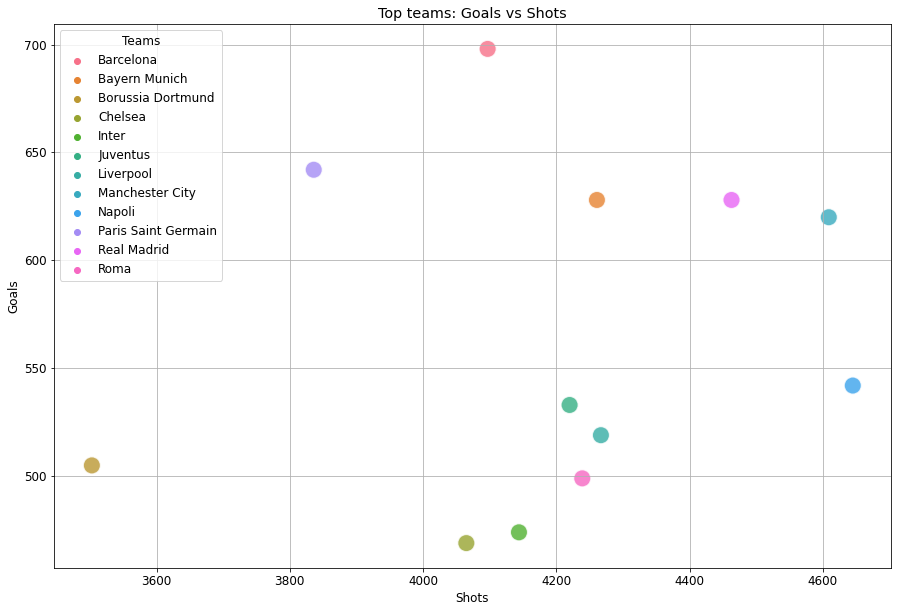

In [14]:
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams.update({'font.size': 12})
# plt.figure(facecolor='#333333')
sns_plot = sns.scatterplot(
    data=df_teams_top10,
    y="goals", x="shots",
    hue="name", alpha=0.8, s=300,
)
plt.grid()
plt.legend(title="Teams")
sns_plot.set(ylabel="Goals", xlabel="Shots", title="Top teams: Goals vs Shots");
# sns_plot.xaxis.label.set_color('white')
# sns_plot.yaxis.label.set_color('white')
# sns_plot.tick_params(colors='white', which='both')
# sns_plot.title.set_color('white')

> 5. Realicen el mismo gráfico de dispersión pero teniendo en cuenta todos los equipos (o sea, no
tengan en cuenta el filtro de los ejercicios anteriores). ¿Ahora se observa alguna relación?

In [15]:
df_teams_shots_goals = df_teams_joined[['name', 'goals', 'shots']]
df_teams_shots_goals = df_teams_shots_goals.groupby(['name']).sum()
df_teams_shots_goals

,goals,shots
name,,
AC Milan,410,3926
Alaves,190,1874
Almeria,35,394
Amiens,99,982
Angers,234,2605
...,...,...
Werder Bremen,334,2938
West Bromwich Albion,181,1909
West Ham,367,3247


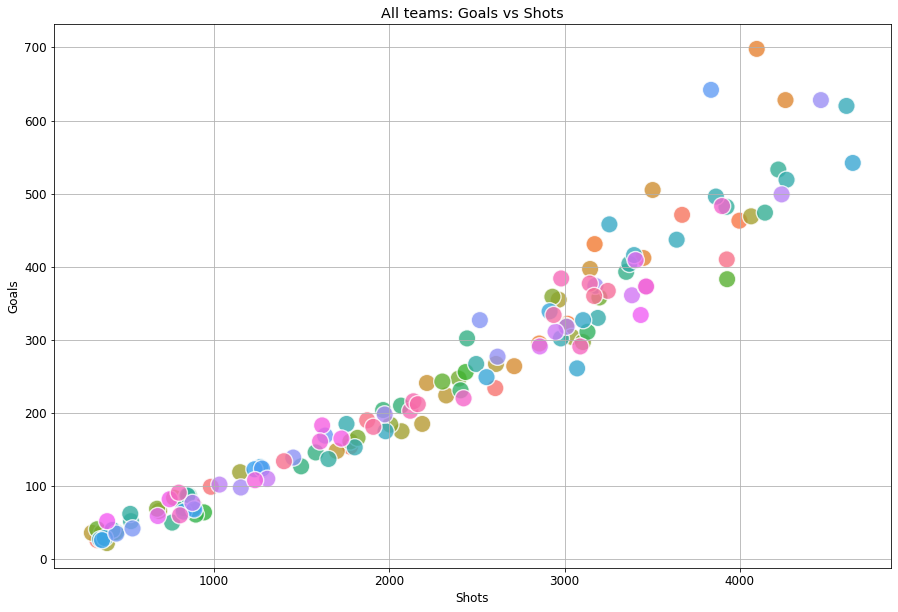

In [17]:
# TODO: Aplicar interactividad al scatter plot para identificar los equipos
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams.update({'font.size': 12})
# plt.figure(facecolor='#333333')
sns_plot = sns.scatterplot(
    data=df_teams_shots_goals,
    y="goals", x="shots",
    hue="name", alpha=0.8, s=300, legend=False
)
plt.grid()
sns_plot.set(ylabel="Goals", xlabel="Shots", title="All teams: Goals vs Shots");
# sns_plot.xaxis.label.set_color('white')
# sns_plot.yaxis.label.set_color('white')
# sns_plot.tick_params(colors='white', which='both')
# sns_plot.title.set_color('white')

> 6. Elijan una de las 5 ligas europeas (y por qué la Premier League).

> 7. Quédense con los 5 jugadores que más goles han metido en esa Liga.

In [13]:
df_appearances = pd.read_csv('./data/appearances.csv')
df_players = pd \
    .read_csv('./data/players.csv', encoding='ISO-8859-1') \
    .rename(columns={'name': 'playerName'})
df_leagues = pd \
    .read_csv('./data/leagues.csv') \
    .rename(columns={'name': 'leagueName'})

In [14]:
df_leagues

,leagueID,leagueName,understatNotation
0,1,Premier League,EPL
1,2,Serie A,Serie_A
2,3,Bundesliga,Bundesliga
3,4,La Liga,La_liga
4,5,Ligue 1,Ligue_1


In [15]:
df_players_joined = df_appearances.merge(df_players, on="playerID").merge(df_leagues, on="leagueID")
df_players_joined_PL = df_players_joined[df_players_joined["leagueID"] == 1] # Premier League
df_players_joined_PL

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,...,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID,playerName,leagueName,understatNotation
0,81,560,0,0,0,0.0,0.000000,0.000000,0,0,...,1,0,0,90,0,0,1,Sergio Romero,Premier League,EPL
1,91,560,0,0,0,0.0,0.058938,0.058938,0,0,...,1,0,0,90,0,0,1,Sergio Romero,Premier League,EPL
2,101,560,0,0,0,0.0,0.014860,0.014860,0,0,...,1,0,0,90,0,0,1,Sergio Romero,Premier League,EPL
3,120,560,0,0,0,0.0,0.570477,0.570477,0,0,...,1,0,0,90,0,0,1,Sergio Romero,Premier League,EPL
4,3412,560,0,0,0,0.0,0.054445,0.054445,0,0,...,1,0,0,90,0,0,1,Sergio Romero,Premier League,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73300,14806,9356,0,0,0,0.0,0.000000,0.000000,0,0,...,17,0,0,15,0,473260,1,Carney Chukwuemeka,Premier League,EPL
73301,14803,9415,0,0,0,0.0,0.056044,0.056044,0,0,...,17,0,0,1,0,472480,1,Jaden Philogene-Bidace,Premier League,EPL
73302,14807,9552,0,0,0,0.0,0.000000,0.000000,0,0,...,17,0,0,13,0,473285,1,Tyrese Francois,Premier League,EPL
73303,14814,9558,0,0,0,0.0,0.000000,0.000000,0,0,...,17,0,0,3,0,473497,1,Hannibal Mejbri,Premier League,EPL


In [16]:
df_players_top5 = df_players_joined_PL \
    .groupby(['playerName', 'playerID'], as_index=False)['goals'] \
    .sum() \
    .sort_values(by="goals", ascending=False) \
    .head(5)
df_players_top5

,playerName,playerID,goals
516,Harry Kane,647,163
1238,Sergio Agüero,619,132
599,Jamie Vardy,755,118
994,Mohamed Salah,1250,95
1198,Sadio Mané,838,95


>  8. Analicen la distribución de tiempos (en minutos) en los cuales estos jugadores realizaron los goles sin importar en qué club lo hicieron. Para ello:
> - Consideren que todos los goles realizados son el resultado de tiros al arco (shot). Van a
poder entonces encontrar todos los goles realizados a partir del atributo shotResult del dataset shots.
> - Puede serles útil el comando semi_join() como se explica en el Cap. 13.5 de R para Ciencia de Datos.
> - Pueden usar ggridges para mostrar las 5 distribuciones en un mismo gráfico.


In [17]:
df_shots = pd.read_csv('./data/shots.csv')
df_player_shots_top5 = df_shots[
    (df_shots["shooterID"].isin(df_players_top5["playerID"]))
    & (df_shots["shotResult"] == "Goal")
]
df_player_shots_top5 = df_player_shots_top5 \
    .merge(df_players.rename(columns={'playerID': 'shooterID'}), on="shooterID")
df_player_shots_top5

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY,playerName
0,84,755,753.0,10,SetPiece,Cross,Head,Goal,0.016541,0.883,0.645,Jamie Vardy
1,114,755,NaN,85,Penalty,Standard,RightFoot,Goal,0.761169,0.885,0.500,Jamie Vardy
2,129,755,752.0,81,OpenPlay,Pass,LeftFoot,Goal,0.511503,0.935,0.515,Jamie Vardy
3,135,755,750.0,68,OpenPlay,HeadPass,LeftFoot,Goal,0.071508,0.872,0.560,Jamie Vardy
4,144,755,752.0,12,OpenPlay,Chipped,RightFoot,Goal,0.099848,0.947,0.707,Jamie Vardy
...,...,...,...,...,...,...,...,...,...,...,...,...
641,14725,1250,NaN,67,OpenPlay,None,RightFoot,Goal,0.354169,0.955,0.373,Mohamed Salah
642,14739,1250,NaN,56,OpenPlay,Rebound,Head,Goal,0.437468,0.952,0.460,Mohamed Salah
643,14760,1250,NaN,2,OpenPlay,None,LeftFoot,Goal,0.080063,0.913,0.386,Mohamed Salah
644,14770,1250,6665.0,89,OpenPlay,Pass,LeftFoot,Goal,0.468111,0.899,0.428,Mohamed Salah


In [18]:
df_player_shots_count = df_player_shots_top5 \
    .groupby(['minute', 'playerName'], as_index=False)['shotResult'] \
    .count()
df_player_shots_count

,minute,playerName,shotResult
0,0,Harry Kane,3
1,0,Sergio Agüero,2
2,1,Sergio Agüero,1
3,2,Harry Kane,1
4,2,Jamie Vardy,2
...,...,...,...
346,93,Sadio Mané,3
347,94,Harry Kane,1
348,94,Jamie Vardy,2
349,95,Harry Kane,1


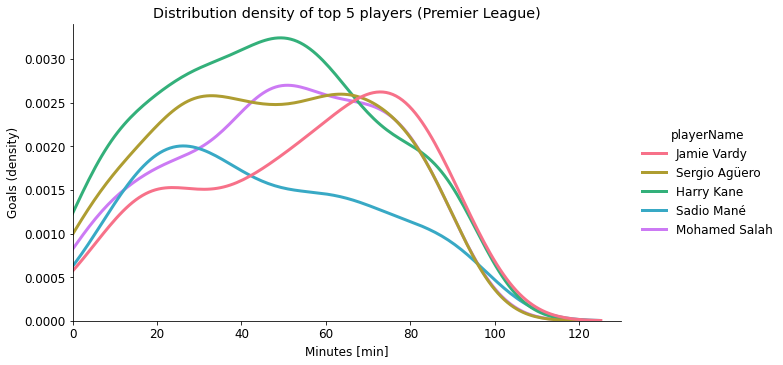

In [23]:
sns_plot = sns.displot(
    data=df_player_shots_top5,
    x="minute", 
    hue="playerName", 
    kind="kde",
    aspect=1.8,
    palette="husl",
    lw=3
)
sns_plot.set(
    ylabel="Goals (density)", xlabel="Minutes [min]",
    title="Distribution density of top 5 players (Premier League)",
    xlim=(0, 130)
);

In [20]:
# playerID: 2097 (Lionel Messi)
